<a href="https://colab.research.google.com/github/lavanya2799/Lavanya/blob/main/Prediction_Of_Loan_Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

**Data Collection and Processing**

In [ ]:
#loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('/content/Dataset.csv')

In [ ]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [ ]:
#printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# number of rows and columns
loan_dataset.shape

(614, 13)

In [ ]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [ ]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [ ]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [ ]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [ ]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [ ]:
# dependent values
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

Data Visualization

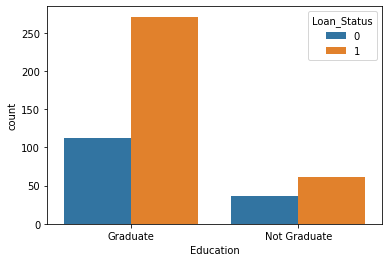

In [ ]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

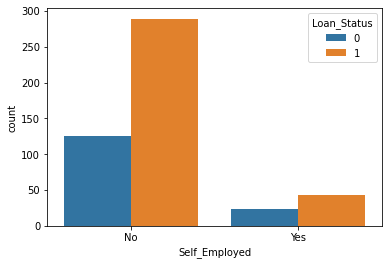

In [ ]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=loan_dataset)

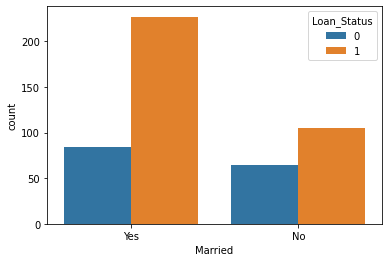

In [ ]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

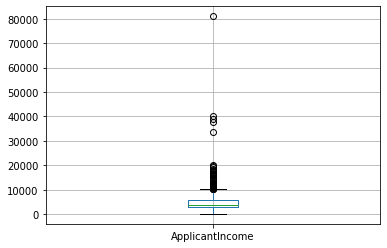

In [ ]:
loan_dataset.boxplot(column='ApplicantIncome')

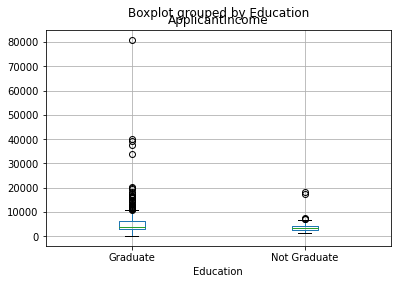

In [ ]:
loan_dataset.boxplot(column='ApplicantIncome', by='Education')

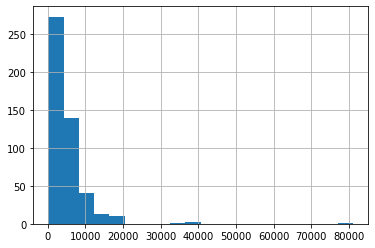

In [ ]:
loan_dataset['ApplicantIncome'].hist(bins=20)

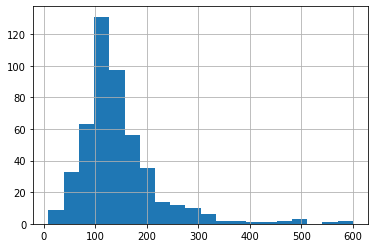

In [ ]:
loan_dataset['LoanAmount'].hist(bins=20)

**Co-relation Matrix**

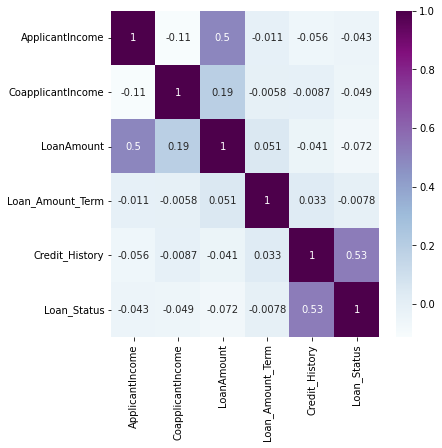

In [ ]:
corr=loan_dataset.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr,annot=True,cmap="BuPu")

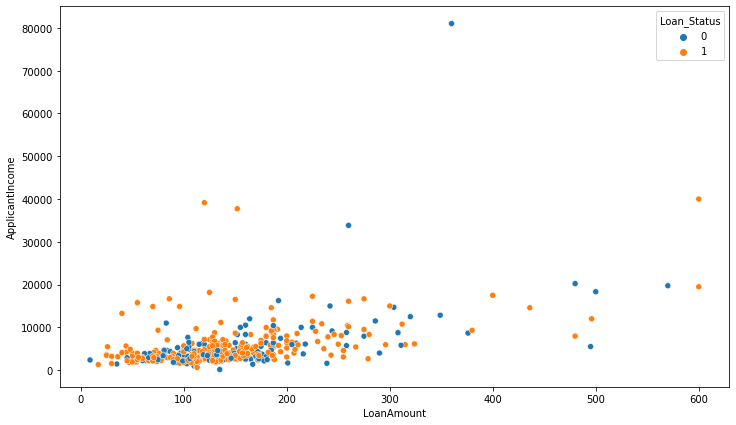

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=loan_dataset,y='ApplicantIncome',x='LoanAmount',hue='Loan_Status')

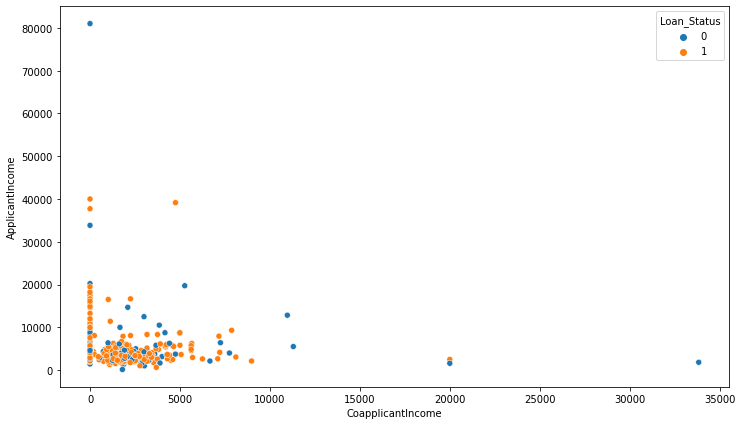

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=loan_dataset,y='ApplicantIncome',x='CoapplicantIncome',hue='Loan_Status')

In [ ]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [ ]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [ ]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

**Data Standardization**

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
print(standardized_data)

[[ 0.46719815  0.73716237  0.11235219 ...  0.27554157  0.41319694
  -1.31886834]
 [ 0.46719815  0.73716237 -0.70475462 ...  0.27554157  0.41319694
   1.25977445]
 [ 0.46719815  0.73716237 -0.70475462 ...  0.27554157  0.41319694
   1.25977445]
 ...
 [ 0.46719815  0.73716237  0.11235219 ...  0.27554157  0.41319694
   1.25977445]
 [ 0.46719815  0.73716237  0.92945899 ...  0.27554157  0.41319694
   1.25977445]
 [-2.14041943 -1.35655324 -0.70475462 ...  0.27554157 -2.42015348
  -0.02954695]]


In [ ]:
X = standardized_data
Y = loan_dataset['Loan_Status']

In [ ]:
print(X)
print(Y)

[[ 0.46719815  0.73716237  0.11235219 ...  0.27554157  0.41319694
  -1.31886834]
 [ 0.46719815  0.73716237 -0.70475462 ...  0.27554157  0.41319694
   1.25977445]
 [ 0.46719815  0.73716237 -0.70475462 ...  0.27554157  0.41319694
   1.25977445]
 ...
 [ 0.46719815  0.73716237  0.11235219 ...  0.27554157  0.41319694
   1.25977445]
 [ 0.46719815  0.73716237  0.92945899 ...  0.27554157  0.41319694
   1.25977445]
 [-2.14041943 -1.35655324 -0.70475462 ...  0.27554157 -2.42015348
  -0.02954695]]
1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


Train Test Split

In [ ]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


Training the model:

Support Vector Machine Model

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
#training the support Vector Macine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation

In [ ]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [ ]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.8055555555555556


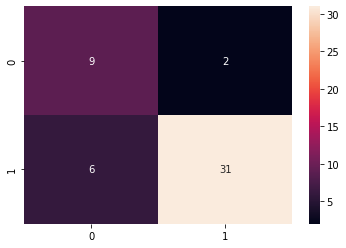

In [ ]:
# accuracy score on testing data
X_test_prediction = classifier.predict(X_test)
cm = confusion_matrix(X_test_prediction,Y_test)
cm
sns.heatmap(cm,annot=True)

In [ ]:
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [ ]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8333333333333334


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k_classifier = KNeighborsClassifier()
k_classifier.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
k_y_pred = k_classifier.predict(X_test)

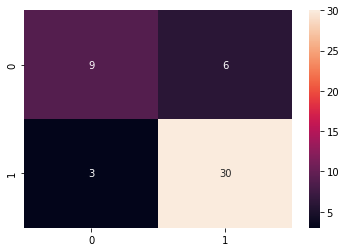

In [ ]:
sns.heatmap(confusion_matrix(Y_test,k_y_pred),annot=True)

In [ ]:
accuracy_score(Y_test,k_y_pred)


0.8125

**Making a Predictive System**

In [ ]:
input_data = (1,0,0,1,0,7660,0,104,360,1,1)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if(prediction[0] == 0):
  print('The loan is not approved')
else:
  print('The loan is approved')

[[ 0.46719815 -1.35655324 -0.70475462  0.50325312 -0.3992747   0.40544496
  -0.604633   -0.50650659  0.27554157  0.41319694 -0.02954695]]
[1]
The loan is approved
